# BRUNO'S SPOTIFY DASHBOARD AND RECOMMENDATION

### Installing Dashboard Lib

In [1]:
pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 16.0 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.7
    Uninstalling Werkzeug-2.3.7:
      Successfully uninstalled Werkzeug-2.3.7
  Attempting uninstall: Flask
    Found existing installation: Flask 2.3.3
    Uninstalling Flask-2.3.3:
      Successfully uninstalled Flask-2.3.3
Note: you may need to restart the kernel to use updated packages.


### Importing dependencies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, html, dcc
from dash.dependencies import Output, Input
from dash.exceptions import PreventUpdate
import plotly.offline as pyo

pyo.init_notebook_mode(connected=True)
pd.set_option('display.max_columns', None)

### Importing Data

In [3]:
musics = pd.read_csv('/kaggle/input/top-spotify-songs-2023/spotify-2023.csv', encoding='latin1')
musics.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


### Getting music's overall data

In [4]:
musics.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


### Giving 'key' attribute based on probability of occurrence on Dataset

In [5]:
musics['key'].fillna(-1, inplace=True)

In [6]:
key_count_df = pd.DataFrame(
musics['key'].value_counts()
)
key_count_df['key'] = key_count_df.index
key_count_df

,count,key
key,,
C#,120,C#
G,96,G
-1,95,-1
G#,91,G#
F,89,F
B,81,B
D,81,D
A,75,A
F#,73,F#


In [7]:
valid_rows = key_count_df[key_count_df['key'] != -1]
total = valid_rows['count'].sum()
valid_rows['Probabilities'] = valid_rows['count'] / total

/tmp/ipykernel_20/526697646.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [8]:
num_minus_ones = key_count_df[key_count_df['key'] == -1]['count'].iloc[0]
replacements = np.random.choice(valid_rows['key'], size=num_minus_ones, p=valid_rows['Probabilities'])

In [9]:
mask = musics['key'] == -1
musics.loc[mask, 'key'] = replacements
musics.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


In [10]:
def encode_values(dataset, column, original_values):
    for value in range(len(original_values)):
        print(value)
        mask = (dataset[column].str.fullmatch(original_values[value]) & (dataset[column].notna()))
        dataset.loc[mask, column] = value

In [11]:
encode_values(musics, 'key', musics['key'].unique())
encode_values(musics, 'mode', ['Major', 'Minor'])

0
1
2
3
4
5
6
7
8
9
10
0
1


In [12]:
musics.sort_values('streams', ascending=False).head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,0,54,0,0,110,3,0,53,75,69,7,0,17,3
33,Anti-Hero,Taylor Swift,1,2022,10,21,9082,56,999748277,242,142,165,9,310,97,8,0,64,51,63,12,0,19,5
625,Arcade,Duncan Laurence,1,2019,3,7,6646,0,991336132,107,47,584,1,NaN,72,3,1,45,27,33,82,0,14,4
253,Glimpse of Us,Joji,1,2022,6,10,6330,6,988515741,109,42,158,3,31,170,6,0,44,27,32,89,0,14,5
455,Seek & Destroy,SZA,1,2022,12,9,1007,0,98709329,5,31,1,0,0,152,1,0,65,35,65,44,18,21,7
98,Summertime Sadness,Lana Del Rey,1,2011,1,1,20333,52,983637508,89,143,"1,632",3,200,112,1,1,56,24,66,7,0,12,3
891,"Come Back Home - From ""Purple Hearts""",Sofia Carson,1,2022,7,12,367,0,97610446,28,67,195,0,0,145,7,0,56,43,53,24,0,12,4
427,Where Are You Now,"Lost Frequencies, Calum Scott",2,2021,7,30,10565,44,972509632,238,122,557,17,58,121,5,1,67,26,64,52,0,17,10
322,I Love You So,The Walters,1,2014,11,28,7536,7,972164968,44,19,135,0,6,76,9,0,58,46,67,65,0,13,4
130,Queencard,(G)I-DLE,1,2023,5,15,451,33,96273746,10,126,7,0,148,130,8,1,82,69,83,3,0,27,5


## Drawing Heatmap to see correlations

In [13]:
musics_to_heatmap = musics.copy()
musics_to_heatmap

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,0,0,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,1,0,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,2,0,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,3,0,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,3,1,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,37,1,0,144,3,0,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,8,0,0,166,5,0,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,0,7,0,0,92,1,0,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,26,17,0,0,97,1,0,82,67,77,8,0,12,5


### Dropping non-useful columns

In [14]:
musics_to_heatmap.drop(columns=['track_name', 'artist(s)_name'], inplace=True)

### Dropping faulty row

In [15]:
musics_to_heatmap.drop([574], inplace=True)
musics_to_heatmap

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,2,2023,7,14,553,147,141381703,43,263,45,10,826,125,0,0,80,89,83,31,0,8,4
1,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,1,0,71,61,74,7,0,10,4
2,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,2,0,51,32,53,17,0,31,6
3,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,3,0,55,58,72,11,0,11,15
4,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,3,1,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,1,2022,11,3,953,0,91473363,61,13,37,1,0,144,3,0,60,24,39,57,0,8,3
949,1,2022,10,21,1180,0,121871870,4,0,8,0,0,166,5,0,42,7,24,83,1,12,6
950,2,2022,11,3,573,0,73513683,2,0,7,0,0,92,1,0,80,81,67,4,0,8,6
951,3,2022,10,20,1320,0,133895612,29,26,17,0,0,97,1,0,82,67,77,8,0,12,5


### Searching for possible string values on columns where it should be int or float

In [16]:
musics_to_heatmap.isin(['1,021']).any()

artist_count            False
released_year           False
released_month          False
released_day            False
in_spotify_playlists    False
in_spotify_charts       False
streams                 False
in_apple_playlists      False
in_apple_charts         False
in_deezer_playlists     False
in_deezer_charts        False
in_shazam_charts         True
bpm                     False
key                     False
mode                    False
danceability_%          False
valence_%               False
energy_%                False
acousticness_%          False
instrumentalness_%      False
liveness_%              False
speechiness_%           False
dtype: bool

### Converting every str or NaN to int/float

In [17]:
musics_to_heatmap['in_deezer_playlists'].fillna(0)
musics_to_heatmap['in_deezer_charts'].fillna(0)
musics_to_heatmap['in_shazam_charts'].fillna(0)
musics_to_heatmap['in_deezer_playlists'] = musics_to_heatmap['in_deezer_playlists'].str.replace(',', '').astype(int)
musics_to_heatmap['in_shazam_charts'] = musics_to_heatmap['in_shazam_charts'].str.replace(',', '').astype(float)

### Drawing heatmap

<Axes: >

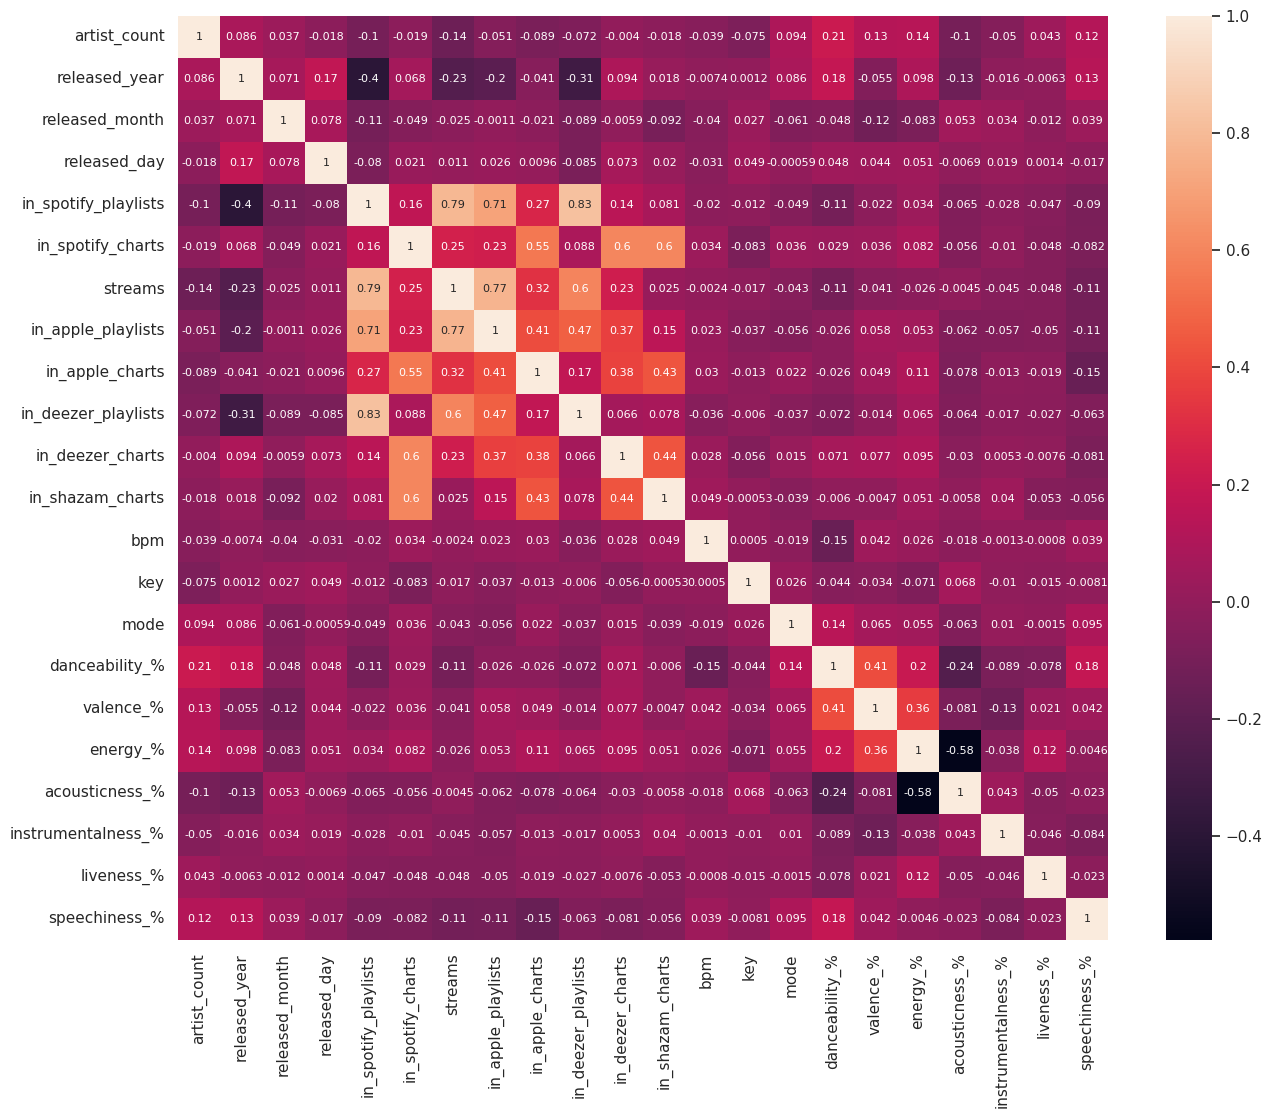

In [18]:
corr = musics_to_heatmap.corr()
sns.set(rc={'figure.figsize':(15,12)})
sns.heatmap(corr, annot=True, annot_kws={"size": 8})

## Conclusions

#### Older songs are more likely to be on a playlist, for every music streaming service, as shown by the bigger negative correlations between year of launch and num of playlists;
#### A music with more Acousticness have less energy;
#### A music with more Danceability has more energy and more valence;
#### A music that is in a lot of playlists from one of the music streaming services is high likely to be in a lot of playlists from the other services, as show by the high to very high correlation between them;
#### High number of streams means high number of playlists with the music

## Preparing data to draw chats for Dashboard

### Processing some of the data

In [19]:
musics = musics[~(musics == 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3').any(axis=1)]
musics['streams'] = musics['streams'].astype(int)
musics.drop_duplicates(subset='track_name', inplace=True)

In [20]:
musics['artist(s)_name'] = musics["artist(s)_name"].str.split(', ')
musics['artist(s)_name'].head(5)

0    [Latto, Jung Kook]
1         [Myke Towers]
2      [Olivia Rodrigo]
3        [Taylor Swift]
4           [Bad Bunny]
Name: artist(s)_name, dtype: object

### Testing new artist(s)_name

In [21]:
musics[musics['artist(s)_name'].apply(lambda x: 'Taylor Swift' in x)].head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
3,Cruel Summer,[Taylor Swift],1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,3,0,55,58,72,11,0,11,15
21,I Can See You (Taylorï¿½ï¿½ï¿½s Version) (From...,[Taylor Swift],1,2023,7,7,516,38,52135248,73,119,42,1,150,123,5,0,69,82,76,6,0,6,3
33,Anti-Hero,[Taylor Swift],1,2022,10,21,9082,56,999748277,242,142,165,9,310,97,8,0,64,51,63,12,0,19,5
37,Blank Space,[Taylor Swift],1,2014,1,1,11434,53,1355959075,154,123,410,2,81,96,2,0,75,57,68,9,0,13,6
38,Style,[Taylor Swift],1,2014,1,1,7830,42,786181836,94,111,151,4,82,95,4,0,60,48,79,0,0,12,4


### Testing streams sorting for graph

In [22]:
musics.sort_values(by=['streams'], ascending=False, inplace=True)
musics.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,[The Weeknd],1,2019,11,29,43899,69,3703895074,672,199,"3,421",20,NaN,171,1,0,50,38,80,0,0,9,7
179,Shape of You,[Ed Sheeran],1,2017,1,6,32181,10,3562543890,33,0,"6,808",7,0,96,1,1,83,93,65,58,0,9,8
86,Someone You Loved,[Lewis Capaldi],1,2018,11,8,17836,53,2887241814,440,125,"1,800",0,NaN,110,1,0,50,45,41,75,0,11,3
620,Dance Monkey,[Tones and I],1,2019,5,10,24529,0,2864791672,533,167,"3,595",6,NaN,98,5,1,82,54,59,69,0,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"[Post Malone, Swae Lee]",2,2018,10,9,24094,78,2808096550,372,117,843,4,69,90,4,0,76,91,50,54,0,7,5
162,One Dance,"[Drake, WizKid, Kyla]",3,2016,4,4,43257,24,2713922350,433,107,"3,631",0,26,104,1,0,77,36,63,1,0,36,5
84,STAY (with Justin Bieber),"[Justin Bieber, The Kid Laroi]",2,2021,7,9,17050,36,2665343922,492,99,798,31,0,170,1,0,59,48,76,4,0,10,5
140,Believer,[Imagine Dragons],1,2017,1,31,18986,23,2594040133,250,121,"2,969",10,31,125,9,1,77,74,78,4,0,23,11
725,Closer,"[The Chainsmokers, Halsey]",2,2016,5,31,28032,0,2591224264,315,159,"2,179",0,44,95,6,0,75,64,52,41,0,11,3
48,Starboy,"[The Weeknd, Daft Punk]",2,2016,9,21,29536,79,2565529693,281,137,"2,445",1,140,186,7,0,68,49,59,16,0,13,28


### Drawing Charts

In [23]:
exploded_df = musics.explode('artist(s)_name')

artist_counts = exploded_df['artist(s)_name'].value_counts().reset_index()
artist_counts.columns = ['artist_name', 'track_count']

top_artists = artist_counts.head(10)

fig_most_tracks = px.bar(top_artists, 
             x='artist_name', 
             y='track_count', 
             title='Top 10 Artists with Most Tracks',
             color='artist_name')

mean_track_count = top_artists['track_count'].mean()
fig_most_tracks.add_hline(y=mean_track_count, line_dash='dash', line_color='grey', annotation_text=f"Mean: {mean_track_count:.2f}", annotation_position="top right")

fig_most_tracks.show()

In [24]:
exploded_df = musics.explode('artist(s)_name')

artist_stream_counts = exploded_df.groupby('artist(s)_name')['streams'].sum().reset_index()
artist_stream_counts.columns = ['artist_name', 'streaming_count']

top_artists_streams = artist_stream_counts.sort_values(by='streaming_count', ascending=False).head(10)

fig_most_streams = px.bar(top_artists_streams, 
             x='artist_name', 
             y='streaming_count', 
             title='Top 10 Artists with Most Streams',
             color='artist_name')

mean_stream_count = top_artists_streams['streaming_count'].mean()
fig_most_streams.add_hline(y=mean_stream_count, line_dash='dash', line_color='grey', annotation_text=f"Mean: {mean_stream_count:.2f}", annotation_position="top right")

fig_most_streams.show()

In [25]:
fig_track_most_streams = px.bar(
    musics.head(10),
    x='track_name',
    y='streams',
    title='Top 10 Tracks by Stream Count',
    color='track_name',  
).update_layout(width=1200, height=500, legend=dict(
    x=1,  
    y=1  
))
    
fig_track_most_streams.add_hline(
    y=musics['streams'].mean(),
    line_dash='dash',
    line_color='grey',
    annotation_text=f"Mean: {musics['streams'].mean():.2f}",
    annotation_position="top right"
)

fig_track_most_streams.show()

In [26]:
musics['in_deezer_playlists'].fillna(0)
musics['in_apple_playlists'].fillna(0)
musics['in_spotify_playlists'].fillna(0)
musics['in_deezer_playlists'] = musics['in_deezer_playlists'].str.replace(',', '').astype(int)

In [27]:
exploded_df = musics.explode('artist(s)_name')
# artist_playlist_counts = exploded_df.groupby('artist(s)_name')[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']].sum().reset_index()
artist_playlist_counts = exploded_df.groupby('artist(s)_name')['in_spotify_playlists'].sum().reset_index()
artist_playlist_counts['total_playlists'] = artist_playlist_counts['in_spotify_playlists']

# Sorting by total_playlists and getting the top artists
top_artists_playlists = artist_playlist_counts.sort_values(by='total_playlists', ascending=False).head(10)

# 2. Plotting
fig_playlist_spotify = px.bar(top_artists_playlists, 
                      x='artist(s)_name', 
                      y='total_playlists', 
                      title='Top 10 Artists with Most Playlist Appearances (Spotify)',
                      color='artist(s)_name').update_layout(yaxis_type="log")

# 3. Adding mean dashed line
mean_playlist_count = top_artists_playlists['total_playlists'].mean()
fig_playlist_spotify.add_hline(y=mean_playlist_count, 
                       line_dash='dash', 
                       line_color='grey', 
                       annotation_text=f"Mean: {mean_playlist_count:.2f}", 
                       annotation_position="top right")

fig_playlist_spotify.show()

In [28]:
exploded_df = musics.explode('artist(s)_name')
# artist_playlist_counts = exploded_df.groupby('artist(s)_name')[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']].sum().reset_index()
artist_playlist_counts = exploded_df.groupby('artist(s)_name')['in_apple_playlists'].sum().reset_index()
artist_playlist_counts['total_playlists'] = artist_playlist_counts['in_apple_playlists']

# Sorting by total_playlists and getting the top artists
top_artists_playlists = artist_playlist_counts.sort_values(by='total_playlists', ascending=False).head(10)

# 2. Plotting
fig_playlist_apple = px.bar(top_artists_playlists, 
                      x='artist(s)_name', 
                      y='total_playlists', 
                      title='Top 10 Artists with Most Playlist Appearances (Apple Music)',
                      color='artist(s)_name').update_layout(yaxis_type="log")

# 3. Adding mean dashed line
mean_playlist_count = top_artists_playlists['total_playlists'].mean()
fig_playlist_apple.add_hline(y=mean_playlist_count, 
                       line_dash='dash', 
                       line_color='grey', 
                       annotation_text=f"Mean: {mean_playlist_count:.2f}", 
                       annotation_position="top right")

fig_playlist_apple.show()

In [29]:
exploded_df = musics.explode('artist(s)_name')
# artist_playlist_counts = exploded_df.groupby('artist(s)_name')[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']].sum().reset_index()
artist_playlist_counts = exploded_df.groupby('artist(s)_name')['in_deezer_playlists'].sum().reset_index()
artist_playlist_counts['total_playlists'] = artist_playlist_counts['in_deezer_playlists']

# Sorting by total_playlists and getting the top artists
top_artists_playlists = artist_playlist_counts.sort_values(by='total_playlists', ascending=False).head(10)

# 2. Plotting
fig_playlist_deezer = px.bar(top_artists_playlists, 
                      x='artist(s)_name', 
                      y='total_playlists', 
                      title='Top 10 Artists with Most Playlist Appearances (Deezer)',
                      color='artist(s)_name').update_layout(yaxis_type="log")

# 3. Adding mean dashed line
mean_playlist_count = top_artists_playlists['total_playlists'].mean()
fig_playlist_deezer.add_hline(y=mean_playlist_count, 
                       line_dash='dash', 
                       line_color='grey', 
                       annotation_text=f"Mean: {mean_playlist_count:.2f}", 
                       annotation_position="top right")

fig_playlist_deezer.show()

In [30]:
exploded_df = musics.explode('artist(s)_name')
artist_playlist_counts = exploded_df.groupby('artist(s)_name')[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']].sum().reset_index()
artist_playlist_counts['total_playlists'] = artist_playlist_counts['in_spotify_playlists'] + artist_playlist_counts['in_apple_playlists'] + artist_playlist_counts['in_deezer_playlists']

# Sorting by total_playlists and getting the top artists
top_artists_playlists = artist_playlist_counts.sort_values(by='total_playlists', ascending=False).head(10)

# 2. Plotting
fig_playlist = px.bar(top_artists_playlists, 
                      x='artist(s)_name', 
                      y='total_playlists', 
                      title='Top 10 Artists with Most Playlist Appearances (Total)',
                      color='artist(s)_name').update_layout(yaxis_type="log")

# 3. Adding mean dashed line
mean_playlist_count = top_artists_playlists['total_playlists'].mean()
fig_playlist.add_hline(y=mean_playlist_count, 
                       line_dash='dash', 
                       line_color='grey', 
                       annotation_text=f"Mean: {mean_playlist_count:.2f}", 
                       annotation_position="top right")

fig_playlist.show()

In [31]:
import os
import signal

def kill_process_on_port(port):
    """Kill the process running on the given port."""
    command = f"lsof -t -i:{port}"
    process = os.popen(command)
    result = process.read()
    process.close()

    if result:
        pids = result.split("\n")[:-1]
        for pid in pids:
            os.kill(int(pid), signal.SIGKILL)

In [32]:
#Histograms

app = Dash(__name__)

app.layout = html.Div([
    html.H1("Bruno's Music Dashboard"),
    
    # Main selector
    dcc.RadioItems(
        id='main-selector',
        options=[
            {'label': 'Artists Numbers', 'value': 'artists-plots'},
            {'label': 'Streaming Services Numbers', 'value': 'streaming-plots'},
            {'label': 'Histogram Selection', 'value': 'hist'},
            {'label': 'Boxplot Selection', 'value': 'boxplot'},
        ],
        value='artists-plots',
        labelStyle={'display': 'block'}
    ),
    
    # Predefined plots
    html.Div(id='artists-plots-div', children=[
        dcc.Graph(id='plot1', figure=fig_most_tracks),
        dcc.Graph(id='plot2', figure=fig_most_streams),
        dcc.Graph(id='plot3', figure=fig_track_most_streams),
    ]),

    html.Div(id='streaming-plots-div', children=[
        dcc.Graph(id='plot4', figure=fig_playlist_spotify),
        dcc.Graph(id='plot5', figure=fig_playlist_apple),
        dcc.Graph(id='plot6', figure=fig_playlist_deezer),
        # Add more graphs here
    ], style={'display': 'none'}),
    
    # Histogram selection
    html.Div(id='hist-div', children=[
        html.H3('Column Selection for Histogram:'),
        dcc.Dropdown(
            id='dropdown',
            options=[{'label': x, 'value': x} for x in musics.columns if musics[x].dtype == 'int64'],
            value='streams',
        ),
        dcc.Graph(id='visual')
    ], style={'display': 'none'}),

    html.Div(id='boxplot-div', children=[
        html.H3('Column Selection for Boxplot:'),
        dcc.Dropdown(
            id='boxplot-dropdown',
            options=[{'label': x, 'value': x} for x in musics.columns if musics[x].dtype == 'int64'],
            value='streams'
        ),
        dcc.Graph(id='boxplot-visual')
    ], style={'display': 'none'}),

])

@app.callback(
    [Output('artists-plots-div', 'style'),
     Output('streaming-plots-div', 'style'),
     Output('hist-div', 'style'),
     Output('boxplot-div', 'style')],
    [Input('main-selector', 'value')]
)
def toggle_layout(selected_value):
    if selected_value == 'artists-plots':
        return {'display': 'block'}, {'display': 'none'}, {'display': 'none'}, {'display': 'none'}
    elif selected_value == 'streaming-plots':
        return {'display': 'none'}, {'display': 'block'}, {'display': 'none'}, {'display': 'none'}
    elif selected_value == 'hist':
        return {'display': 'none'}, {'display': 'none'}, {'display': 'block'}, {'display': 'none'}
    elif selected_value == 'boxplot':
        return {'display': 'none'}, {'display': 'none'}, {'display': 'none'}, {'display': 'block'}

@app.callback(
    Output('visual', 'figure'),
    [Input('dropdown', 'value')]
)
def update_histogram(selected_column):
    if selected_column:
        return px.histogram(musics, x=selected_column).update_layout(width=1000, height=800)
    return {}

@app.callback(
    Output('boxplot-visual', 'figure'),
    [Input('boxplot-dropdown', 'value')]
)
def update_boxplot(selected_column):
    if selected_column:
        return px.box(musics, y=selected_column).update_layout(width=1000, height=700)
    return {}

if __name__ == '__main__':
    app.run_server(mode='inline', debug=True, port=9013)

## Recommendation - K-Means

### Importing libs

In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Converting lists in 'artist(s)_name' to comma-separated strings

In [34]:
# Convert lists in 'artist(s)_name' to comma-separated strings
musics_for_clustering = musics.copy()
musics_for_clustering['artist(s)_name'] = musics_for_clustering['artist(s)_name'].apply(', '.join)

### Separate numeric and categorical columns

In [35]:
numeric_features = musics_for_clustering.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = ['artist(s)_name']

### Preprocessor

In [36]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='drop'
)

### Elbow Method

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



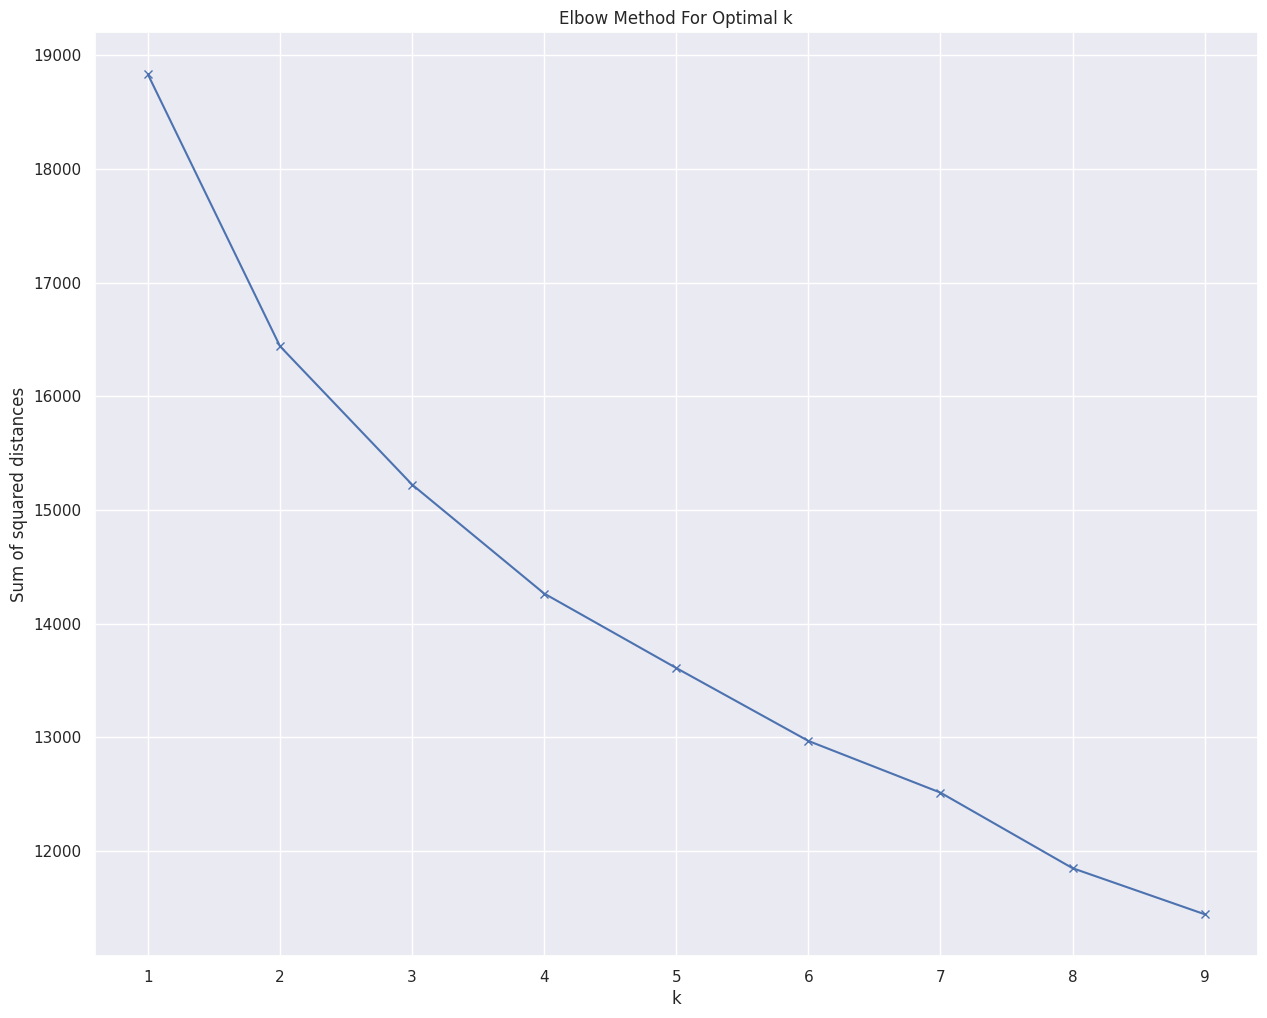

In [37]:
K = range(1,10)
X = preprocessor.fit_transform(musics_for_clustering)
SSD = []
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    SSD.append(km.inertia_)

plt.plot(K, SSD, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Apply KMeans clustering

In [38]:
X = preprocessor.fit_transform(musics_for_clustering)

n_clusters = 2  # Choose based on elbow method
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
musics_for_clustering['cluster'] = kmeans.fit_predict(X)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



### Recommend tracks function

In [39]:
def recommend_tracks(track_name, num_recommendations=10):
    cluster = musics_for_clustering[musics_for_clustering['track_name'] == track_name]['cluster'].iloc[0]
    recommendations_df = musics_for_clustering[
    (musics_for_clustering['cluster'] == cluster) & 
    (musics_for_clustering['streams'] > 200000) &
    (musics_for_clustering['track_name'] != track_name)
][['track_name', 'artist(s)_name']].head(num_recommendations)
    return recommendations_df

### Testing Recommendation

In [40]:
recommend_tracks('Shape of You')

,track_name,artist(s)_name
55,Blinding Lights,The Weeknd
86,Someone You Loved,Lewis Capaldi
620,Dance Monkey,Tones and I
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee"
162,One Dance,"Drake, WizKid, Kyla"
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi"
140,Believer,Imagine Dragons
725,Closer,"The Chainsmokers, Halsey"
48,Starboy,"The Weeknd, Daft Punk"
138,Perfect,Ed Sheeran
